# Sound Recorder

In [13]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
from scipy.fftpack import fft
import pyaudio
#import os
import struct
import time
import wave

# Efeito Doppler
$$ f_O = f_F  \frac{v_{som} \pm  v_O }{v_{som} \mp  v_F }$$

In [15]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024  # 2048

RECORD_SECONDS = 3
WAVE_OUTPUT_FILENAME = "Files/file1.wav"

In [36]:
audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
#print("recording...")
frames = []

nframes = int(RATE / CHUNK * RECORD_SECONDS)

data_np = np.zeros((nframes,CHUNK))

for i in range(0, nframes):
    data = stream.read(CHUNK)
    frames.append(data)
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    # create np array and offset by 128
    data_np[i] = np.array(data_int, dtype='b')[::2] + 128

# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()

In [17]:
data_np.shape

(129L, 1024L)

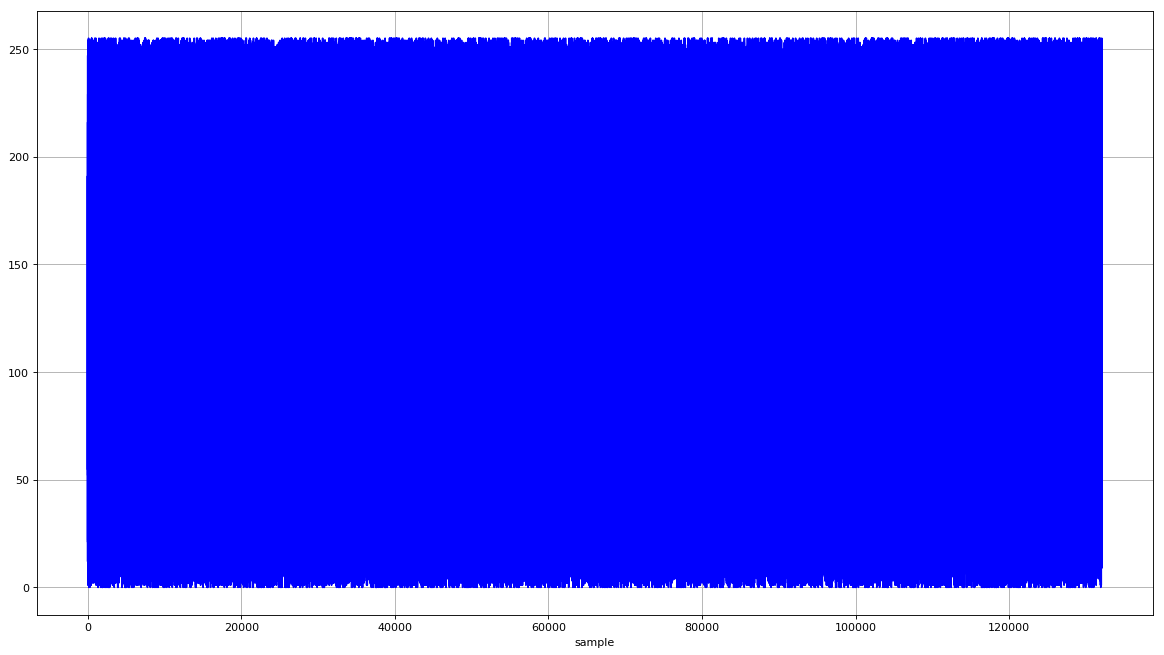

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)   #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
it = 10
ax.plot(data_np.flatten() , 'b', label='s')
#ax.plot(t, sol[:, 1], 'g', label='omega(t)')
#ax.legend(loc='best')
ax.set_xlabel('sample')
ax.grid()
plt.show()


In [26]:
#    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (128 * CHUNK))

it = 10
data_np[it].shape
yf = fft(data_np[it])
yf.shape

(1024L,)

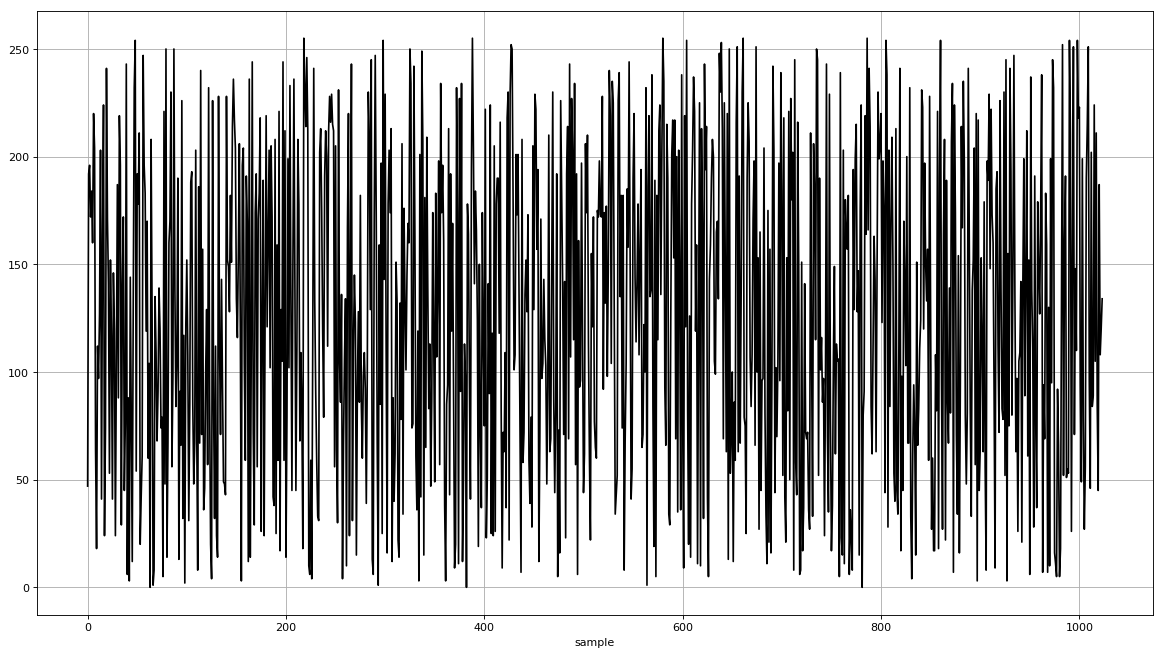

In [43]:
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)   #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
it = 10
ax.plot(data_np[it], 'k', label='s')
#ax.plot(t, sol[:, 1], 'g', label='omega(t)')
#ax.legend(loc='best')
ax.set_xlabel('sample')
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


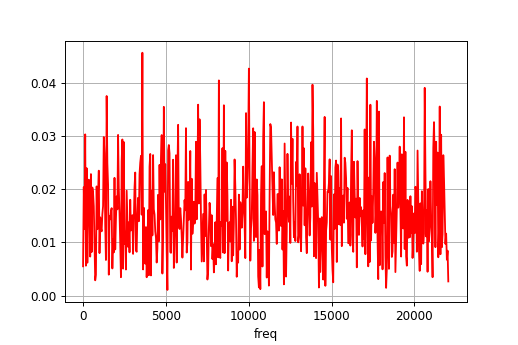

In [44]:
# compute FFT and update line
%matplotlib notebook
yf = fft(data_np[it] - 127)
fig = plt.figure() #figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)   #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
f=np.linspace(0,RATE/2,CHUNK/2)
ax.plot(f,np.abs(yf[0:CHUNK/2])  / (128 * CHUNK), 'r', label='s')
#ax.plot(t, sol[:, 1], 'g', label='omega(t)')
#ax.legend(loc='best')
ax.set_xlabel('freq')
ax.grid()
plt.show()

In [10]:
a=np.zeros((2,10))
a[0] = np.arange(0,10)
a[1] = np.arange(10,20)
a.flatten()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [52]:
#all_data=data_np.flatten()
#all_data.tofile('Files/all_doppler.dat')
#c = np.fromfile('Files/all_doppler.dat')
all_data.dtype
#c.dtype

dtype('float64')

In [38]:
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()